# Linear Regression Review

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
import pylab

In [61]:
Xs, y = make_regression(n_samples=500,n_features=5,n_informative=3,noise=1.5)

This has created two arrays, X containing your predictors and y containing your target. As teams your challenge is the following:

1) Place your data in a dataframe of 'X1':X[0] and so on

2) Create a regression model using the package of your choice

3) Identify which variables hold predictive power

4) Create a new model with only the informative variables

5) Extract your residuals ($y-\hat{y}$), fitted values ($\hat{y}$), and observations $y$.

6) Create a QQ-Plot on the residuals to look for normality

7) Create three relational plots looking at Residuals v. Fitted Values, Fitted Values v. Residuals, and Fitted Values v. Observations

In [62]:
X = pd.DataFrame(Xs,columns=['X1','X2','X3','X4','X5'])
y = pd.DataFrame({'Y':y})
data = pd.DataFrame(np.column_stack([Xs,y]), columns=['X1','X2','X3','X4','X5','Y'])

In [63]:
reg = smf.ols(formula='Y~X1+X2+X3+X4+X5',data=data).fit()

In [64]:
pvalues = pd.DataFrame({'P-Value':reg.pvalues.round(7)})
print(pvalues)

            P-Value
Intercept  0.512681
X1         0.000000
X2         0.000000
X3         0.361241
X4         0.000000
X5         0.929268


In [66]:
reg = smf.ols(formula='Y~X1+X2+X4',data=data).fit()
pvalues = pd.DataFrame({'P-Value':reg.pvalues.round(7)})
print(pvalues)

            P-Value
Intercept  0.538787
X1         0.000000
X2         0.000000
X4         0.000000


In [67]:
VIFs = pd.DataFrame([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns,
                   columns=['VIF Score'])
print(VIFs)

    VIF Score
X1   1.000256
X2   1.013172
X3   1.005262
X4   1.001950
X5   1.011057


In [40]:
residuals = reg.resid
fitted = reg.fittedvalues

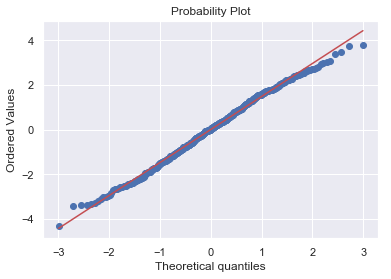

In [68]:
stats.probplot(reg.resid, dist="norm", plot=pylab)
pylab.show()

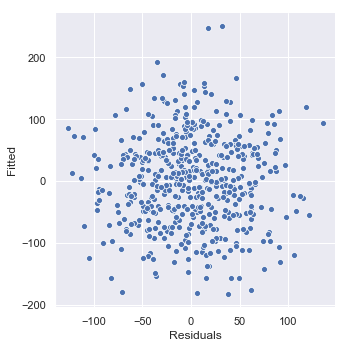

In [69]:
sns.relplot(x='Residuals',y='Fitted',data=pd.DataFrame({'Residuals':residuals,'Fitted':fitted}))

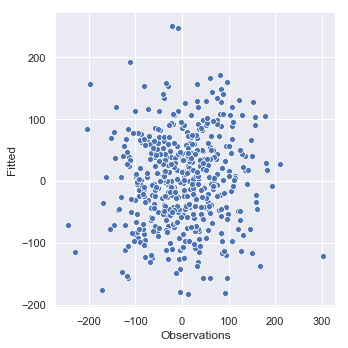

In [70]:
sns.relplot(x='Observations',y='Fitted',data=pd.DataFrame({'Observations':data['Y'],'Fitted':fitted}))

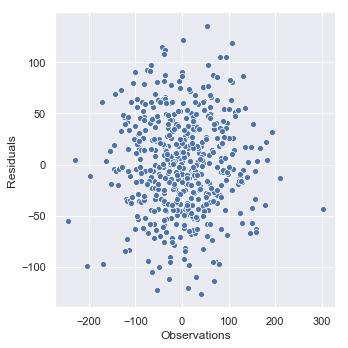

In [71]:
sns.relplot(x='Observations',y='Residuals',data=pd.DataFrame({'Observations':data['Y'],'Residuals':residuals}))